In [1]:
using DifferentialEquations, Plots, DataFrames, BenchmarkTools

First variation of Hill equation with K(0.5)

In [ ]:
function hill_rtcr!(dydt, initial, params, t)

    ka, kd, vmax, kh = params 

    ri, rt, ra = initial

    dridt, drtdt, dradt = zeros(length(dydt))

    v = vmax*rt^6/((kh^6)+rt^6)

    dydt[1] = - ka*ri*rt^6 + kd*ra 
    dydt[2] = - ka*ri*rt^6 + kd*ra 
    dydt[3] = + v # + ka*ri*rt^6 - kd*rarpc 

end

In [ ]:
ka = 10
kd = 0
vmax = 3
kh = 1
params = [ka, kd, vmax, kh]

ri_0 = 3
rt_0 = 1
ra_0 = 0
init = [ri_0, rt_0, ra_0]

tspan = (0.0, 10.0)



In [ ]:
prob = ODEProblem(hill_rtcr!, init, tspan, params);
sol = solve(prob, alg=AutoTsit5(Rosenbrock23()));

In [ ]:
species = ["ri" "rt" "ra"]
species1 = [:ri, :rt, :ra]
solDF = DataFrame([[j[i] for j in sol.u] for i=1:length(sol.u[1])], species1);
ri = solDF[!, :ri];
rt = solDF[!, :rt];
ra = solDF[!, :ra];

In [ ]:
plot(sol, label=species)

In [ ]:
plot(sol.t, ri)

Second version of the Hill equation with KB 

In [142]:
function hill_rtcr_1!(dydt, initial, params, t)

    ka, kd = params 

    rt, ri, ra = initial

    drtdt, dridt, dradt = zeros(length(dydt))

    n = 6
    rtot = ri + ra 
    kb = ra/(ri*(rt^n))
    vmax = 1 #ka*rtot
    v = vmax*kb*(rt^n)/(1+(kb*(rt^n)))
    
    dydt[1] = 6*(-ka*ri*(rt^n) + kd*v) 
    dydt[2] =  - ka*ri*(rt^n) + kd*v
    dydt[3] = v #+ ka*ri*(rt^n) - kd*ra 
    # println((ri+ra))


end

hill_rtcr_1! (generic function with 1 method)

In [143]:
ka = 0.1
kd = 0.1
params_1 = [ka, kd]

rt_0 = 1
ri_0 = 1
ra_0 = 0
init_1 = [rt_0, ri_0, ra_0]

tspan = (0.0, 10.0)

(0.0, 10.0)

In [144]:
prob_1 = ODEProblem(hill_rtcr_1!, init_1, tspan, params_1);
sol_1 = solve(prob_1, alg=Rodas4());

In [145]:
species = ["rt" "ri" "ra"]
species2 = [:rt, :ri, :ra]
solDF_1 = DataFrame([[j[i] for j in sol_1.u] for i=1:length(sol_1.u[1])], species2);
rt_1 = solDF_1[!, :rt];
ri_1 = solDF_1[!, :ri];
ra_1 = solDF_1[!, :ra];

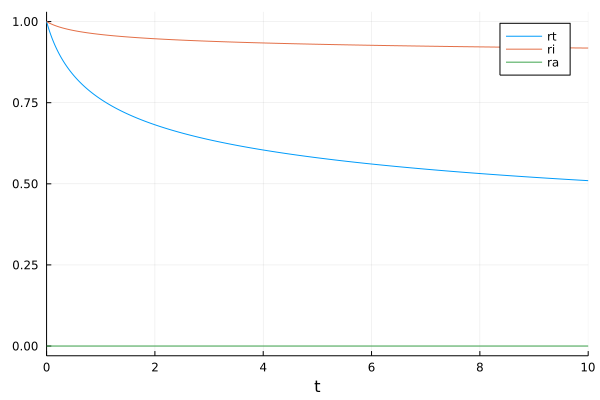

In [146]:
plot(sol_1, labels=species)

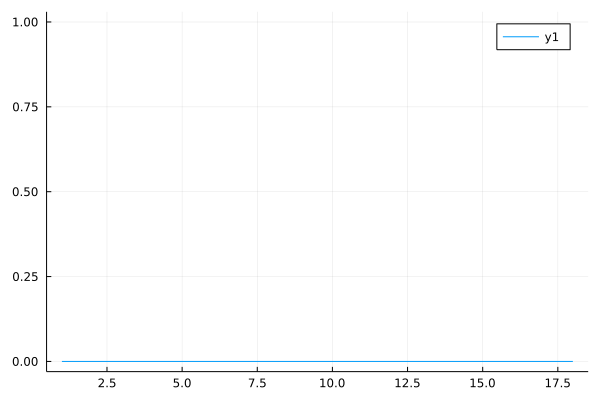

In [147]:
plot(ra_1)

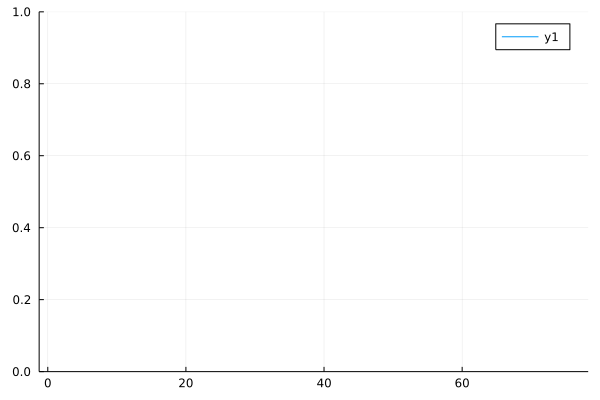

In [78]:
plot(ri_1+ra_1, ylim=(0,1))

In [124]:
function full_rtc!(dydt, initial, params, t)

    k1, k2, k3, k4, k5, a = params

    rt, ri, ra, cc, rp, oc = initial  

    drtdt, dridt, dradt, dccdt, drpdt, docdt = zeros(length(dydt))
    v = vmax*kb*(rt^n)/(1+(kb*(rt^n)))

    dydt[1] = 6*(-k1*ri*(rt^6) + k2*v*cc)
    dydt[2] = -k1*ri*(rt^6) + k2*v*cc
    dydt[3] = v #k1*ri*(rt^6) + k2*ra*cc - k3*ra*cc + k4*rp - k5*a*rp
    dydt[4] = k1*ri*(rt^6) - k2*ra*cc - k3*ra*cc + k4*rp 
    dydt[5] = -k3*ra*cc + k4*rp - k5*a*rp
    dydt[6] = k5*a*rp

end

full_rtc! (generic function with 1 method)

In [125]:
k1 = 0.1
k2 = 0.1
k3 = 0.1 
k4 = 0.1
k5 = 0.1
a = 10
params = [k1, k2, k3, k4, k5, a]

rt_0 = 20
ri_0 = 10
ra_0 = 0
cc_0 = 10
rp_0 = 0
oc_0 = 0 
init = [rt_0, ri_0, ra_0, cc_0, rp_0, oc_0]

tspan = (0.0, 10.0)

(0.0, 10.0)

In [126]:
prob = ODEProblem(hill_rtcr_1!, init, tspan, params);
sol = solve(prob, alg=Rodas4());

In [127]:
species = ["rt" "ri" "ra" "cc" "rp" "oc"]
species2 = [:rt, :ri, :ra, :cc, :rp, :oc]
solDF = DataFrame([[j[i] for j in sol.u] for i=1:length(sol.u[1])], species2);
rt = solDF[!, :rt];
ri = solDF[!, :ri];
ra = solDF[!, :ra];
cc = solDF[!, :cc];
rp = solDF[!, :rp];
oc = solDF[!, :oc];

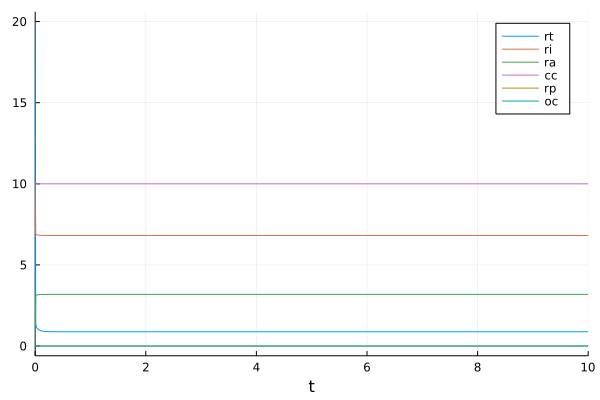

In [128]:
plot(sol, labels=species)

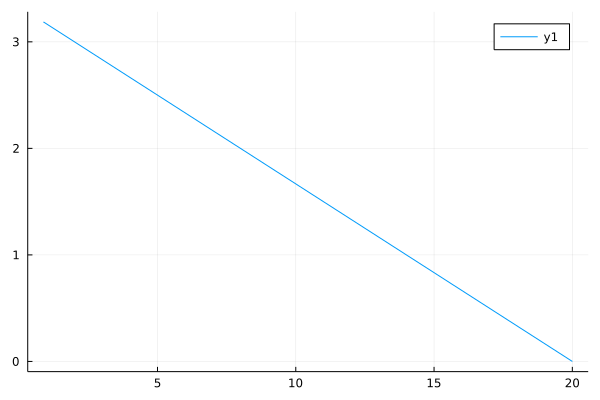

In [129]:
plot(rt, ra)

In [2]:
function rtc_ode!(dydt, initial, params, t)

    k1, k2, k3, k4, katp, ctot, a0, b0 = params 

    b, c, d, p = initial 

    dbdt, dcdt, dddt, dpdt = zeros(length(dydt))
    
    dydt[1] = -6*k1*(b^6)*(((6*a0)-b0+b)/6) + 6*k2*c 
    dydt[2] = k1*(b^6)*(((6*a0)-b0+b)/6) - k2*c - k3*c*d + (k4+katp)*(k3*d*ctot/(k4+katp+k3*d))
    dydt[3] = -k3*c*d + k4*k3*d*ctot/(k4+katp+k3*d)
    dydt[4] = katp*k3*d*ctot/(k4+katp+k3*d) 
end

rtc_ode! (generic function with 1 method)

In [ ]:
k1 = 1
k2 = 1
k3 = 1
k4 = 1
katp = 10
ctot = (a0 + b0)/7
a0 = 10
b0 = 10
params = [k1, k2, k3, k4, katp, ctot, a0, b0]

b_0 = 10
c_0 = 0
d_0 = 10
p_0 = 0 
init = [b_0, c_0, d_0, p_0]

tspan = (0.0, 10.0)

